In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [3]:
data = pd.read_csv('/content/POLOMKA.csv')

In [4]:
data

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure
...,...,...,...,...,...,...,...,...,...,...
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,No Failure
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,No Failure
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,No Failure
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,No Failure


In [5]:
data = data.drop(['UDI','Type', 'Failure Type','Product ID'],axis=1)
data.head(3)

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0


In [6]:
data.dtypes

,0
Air temperature [K],float64
Process temperature [K],float64
Rotational speed [rpm],int64
Torque [Nm],float64
Tool wear [min],int64
Target,int64


In [9]:
data.dropna(subset=['Failure Type'], inplace=True)

KeyError: ['Failure Type']

In [10]:
data.isnull().sum()

,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0


In [12]:
corr_matrix = data[['Air temperature [K]',
                    'Process temperature [K]',
                    'Rotational speed [rpm]',
                    'Torque [Nm]',
                    'Tool wear [min]',
                    'Target']].corr()

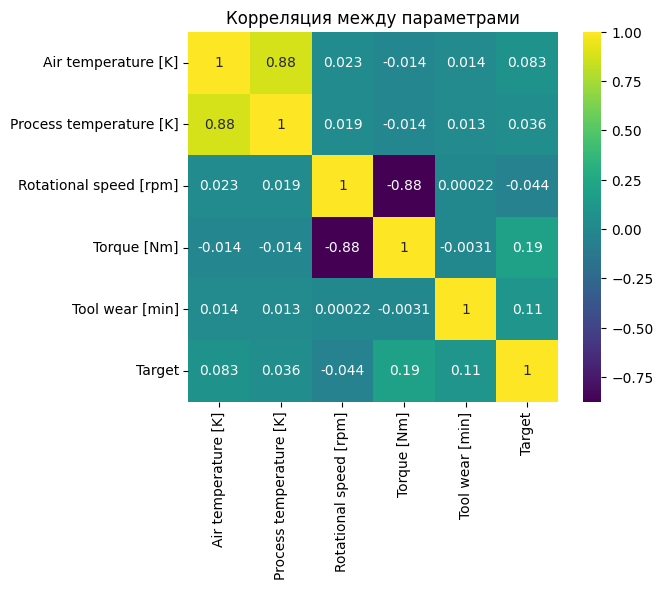

In [14]:
sns.heatmap(corr_matrix,
            vmax=1.0,
            square=True,
            cmap="viridis",
            linecolor='k',
            annot=True)
plt.title("Корреляция между параметрами")
plt.show()

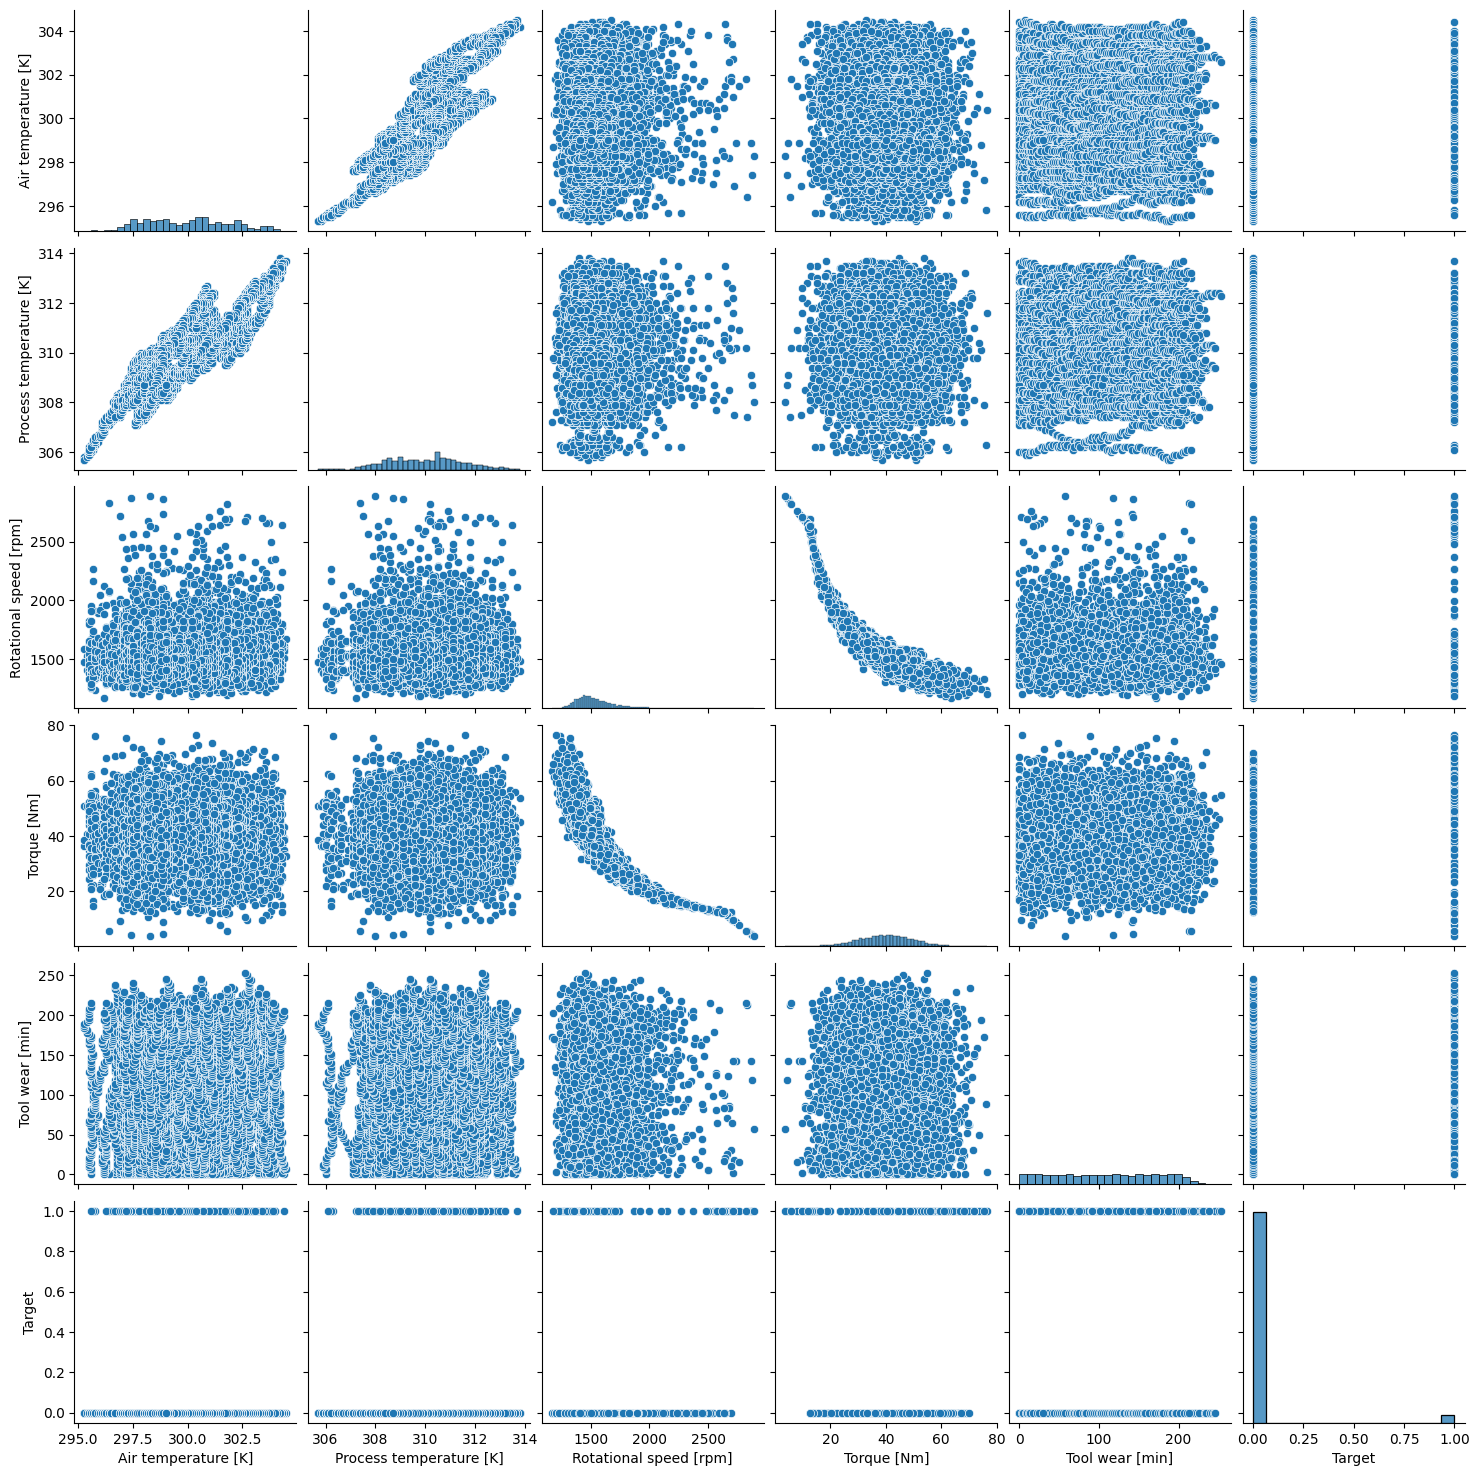

In [16]:
sns.pairplot(data[['Air temperature [K]',
                   'Process temperature [K]',
                   'Rotational speed [rpm]',
                   'Torque [Nm]',
                   'Tool wear [min]',
                   'Target']])
plt.show()

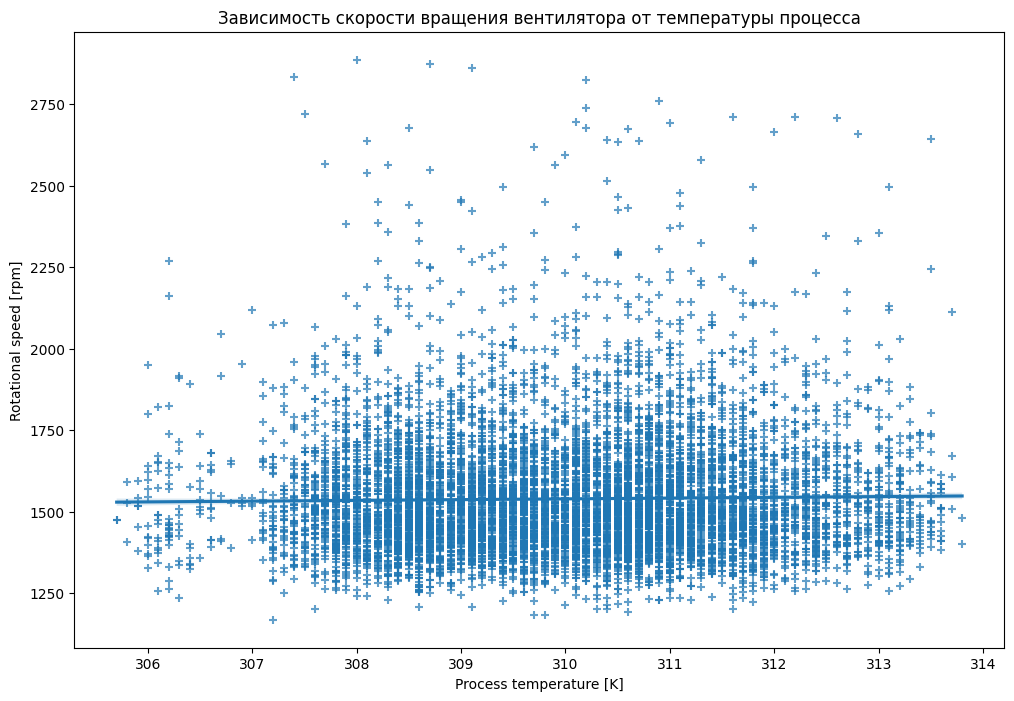

In [17]:
plt.figure(figsize=(12, 8))
sns.regplot(x="Process temperature [K]",
            y="Rotational speed [rpm]",
            data=data,
            marker="+",
            scatter_kws={'alpha': 0.7})
plt.title('Зависимость скорости вращения вентилятора от температуры процесса')
plt.show()


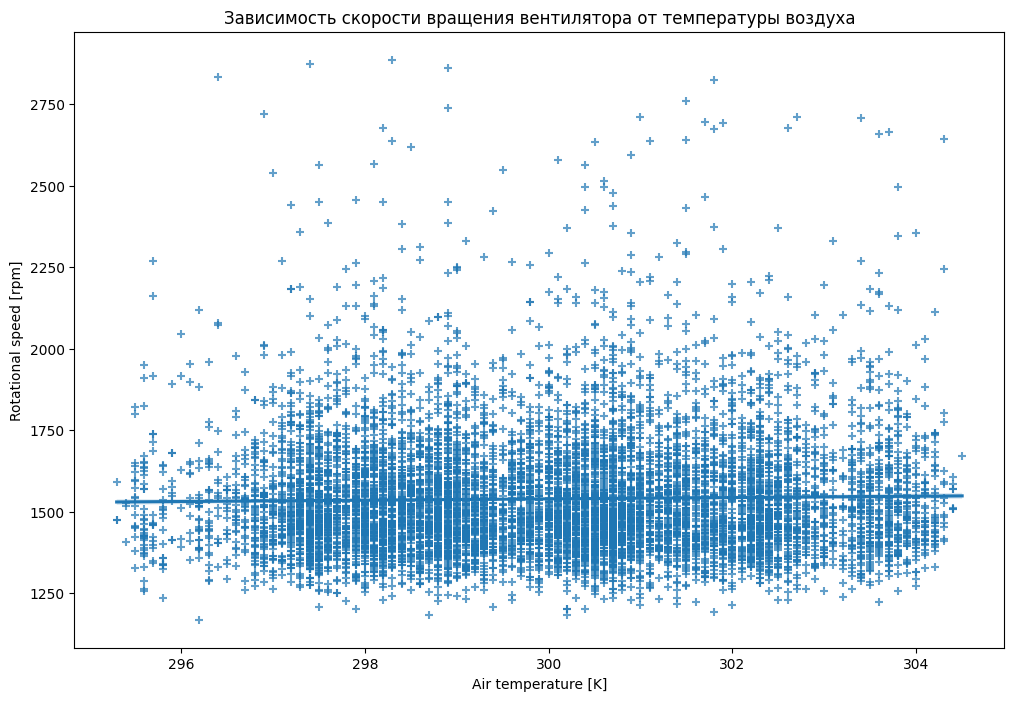

In [18]:
plt.figure(figsize=(12, 8))
sns.regplot(x="Air temperature [K]",
            y="Rotational speed [rpm]",
            data=data,
            marker="+",
            scatter_kws={'alpha': 0.7})
plt.title('Зависимость скорости вращения вентилятора от температуры воздуха')
plt.show()

In [19]:
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [20]:
X = data[['Rotational speed [rpm]']].values
y = data['Process temperature [K]'].values

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)


In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

LinearRegression()

In [24]:
y_pred_lr = lr_model.predict(X_test_scaled)

In [25]:
lr_mse = mean_squared_error(y_test, y_pred_lr)
lr_r2 = r2_score(y_test, y_pred_lr)

print(f"MSE для линейной регрессии: {lr_mse:.4f}")
print(f"R2 для линейной регрессии: {lr_r2:.4f}")

MSE для линейной регрессии: 2.1735
R2 для линейной регрессии: 0.0005


In [26]:
svr_model = SVR(kernel='rbf', gamma='auto')
svr_model.fit(X_train_scaled, y_train)

SVR(gamma='auto')

In [27]:
y_pred_svr = svr_model.predict(X_test_scaled)

In [28]:
svr_mse = mean_squared_error(y_test, y_pred_svr)
svr_r2 = r2_score(y_test, y_pred_svr)

print(f"MSE для SVR: {svr_mse:.4f}")
print(f"R2 для SVR: {svr_r2:.4f}")


MSE для SVR: 2.1839
R2 для SVR: -0.0042


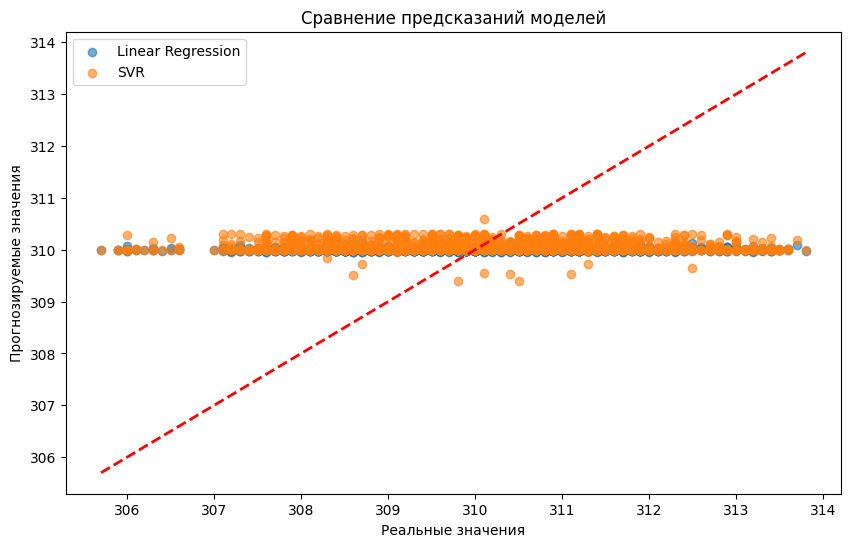

In [29]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_lr, label='Linear Regression', alpha=0.6)
plt.scatter(y_test, y_pred_svr, label='SVR', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.title('Сравнение предсказаний моделей')
plt.xlabel('Реальные значения')
plt.ylabel('Прогнозируемые значения')
plt.legend()
plt.show()

In [30]:
rf_regressor = RandomForestRegressor(random_state=42)
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(rf_regressor, param_grid_rf, cv=5, n_jobs=-1)
grid_search_rf.fit(X_train_scaled, y_train)
best_params_rf = grid_search_rf.best_params_
print("Лучшие параметры для Random Forest:", best_params_rf)


Лучшие параметры для Random Forest: {'max_depth': 5, 'min_samples_leaf': 2, 'n_estimators': 200}


In [31]:
rf_best = RandomForestRegressor(**best_params_rf).fit(X_train_scaled, y_train)
y_pred_rf = rf_best.predict(X_test_scaled)
rf_mse = mean_squared_error(y_test, y_pred_rf)
rf_r2 = r2_score(y_test, y_pred_rf)

print(f"MSE для Random Forest: {rf_mse:.4f}")
print(f"R2 для Random Forest: {rf_r2:.4f}")

MSE для Random Forest: 2.1767
R2 для Random Forest: -0.0009


In [32]:
gb_regressor = GradientBoostingRegressor(random_state=42)
param_grid_gb = {
    'n_estimators': [100, 150],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, None]
}
grid_search_gb = GridSearchCV(gb_regressor, param_grid_gb, cv=5, n_jobs=-1)
grid_search_gb.fit(X_train_scaled, y_train)
best_params_gb = grid_search_gb.best_params_
print("Лучшие параметры для Gradient Boosting:", best_params_gb)

Лучшие параметры для Gradient Boosting: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}


In [33]:
gb_best = GradientBoostingRegressor(**best_params_gb).fit(X_train_scaled, y_train)
y_pred_gb = gb_best.predict(X_test_scaled)
gb_mse = mean_squared_error(y_test, y_pred_gb)
gb_r2 = r2_score(y_test, y_pred_gb)

print(f"MSE для Gradient Boosting: {gb_mse:.4f}")
print(f"R2 для Gradient Boosting: {gb_r2:.4f}")

MSE для Gradient Boosting: 2.1774
R2 для Gradient Boosting: -0.0012


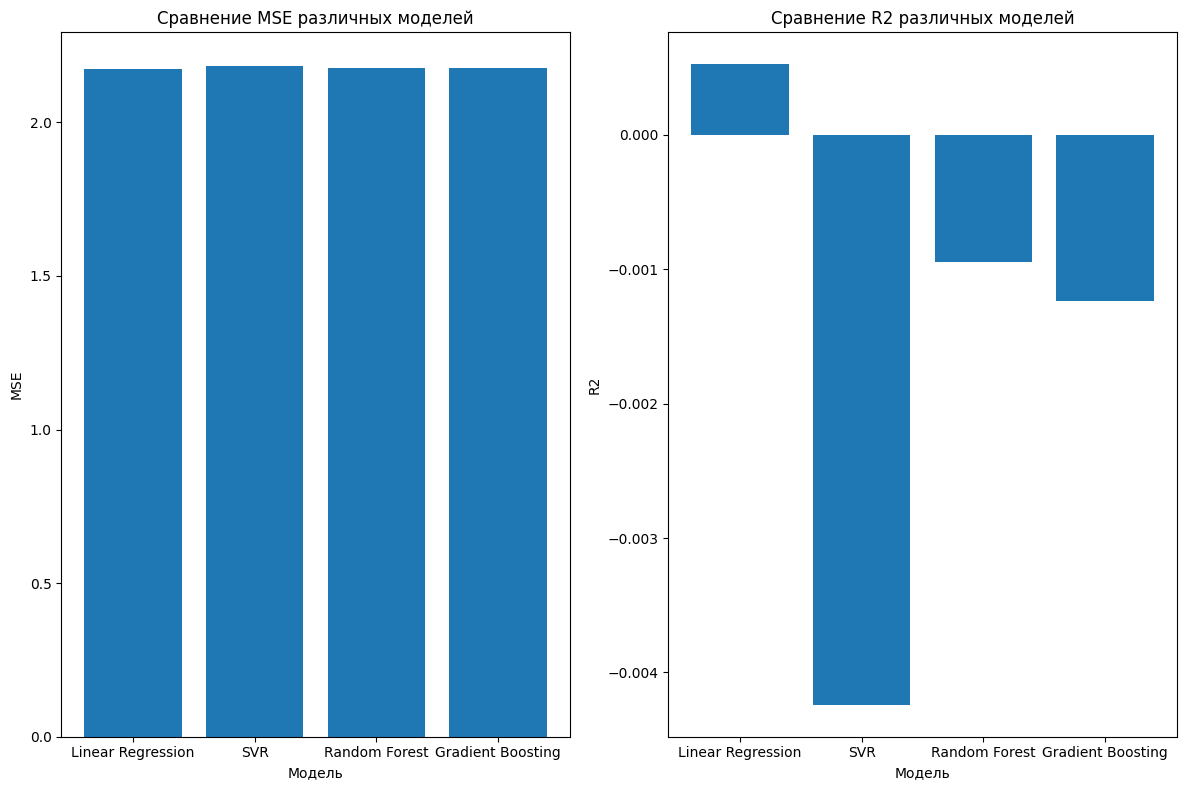

In [34]:
models = ["Linear Regression", "SVR", "Random Forest", "Gradient Boosting"]
mses = [lr_mse, svr_mse, rf_mse, gb_mse]
r2_scores = [lr_r2, svr_r2, rf_r2, gb_r2]

plt.figure(figsize=(12, 8))
plt.subplot(121)
plt.bar(models, mses)
plt.title('Сравнение MSE различных моделей')
plt.xlabel('Модель')
plt.ylabel('MSE')

plt.subplot(122)
plt.bar(models, r2_scores)
plt.title('Сравнение R2 различных моделей')
plt.xlabel('Модель')
plt.ylabel('R2')

plt.tight_layout()
plt.show()

In [35]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(model, title, X, y):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

    train_scores_mean = -np.mean(train_scores, axis=1)
    train_scores_std = -np.std(train_scores, axis=1)
    test_scores_mean = -np.mean(test_scores, axis=1)
    test_scores_std = -np.std(test_scores, axis=1)

    plt.figure(figsize=(12, 8))
    plt.title(title)
    plt.xlabel("Количество обучающих примеров")
    plt.ylabel("Среднеквадратичная ошибка (MSE)")

    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Ошибка на обучении")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Ошибка на проверке")

    plt.legend(loc="best")
    plt.show()

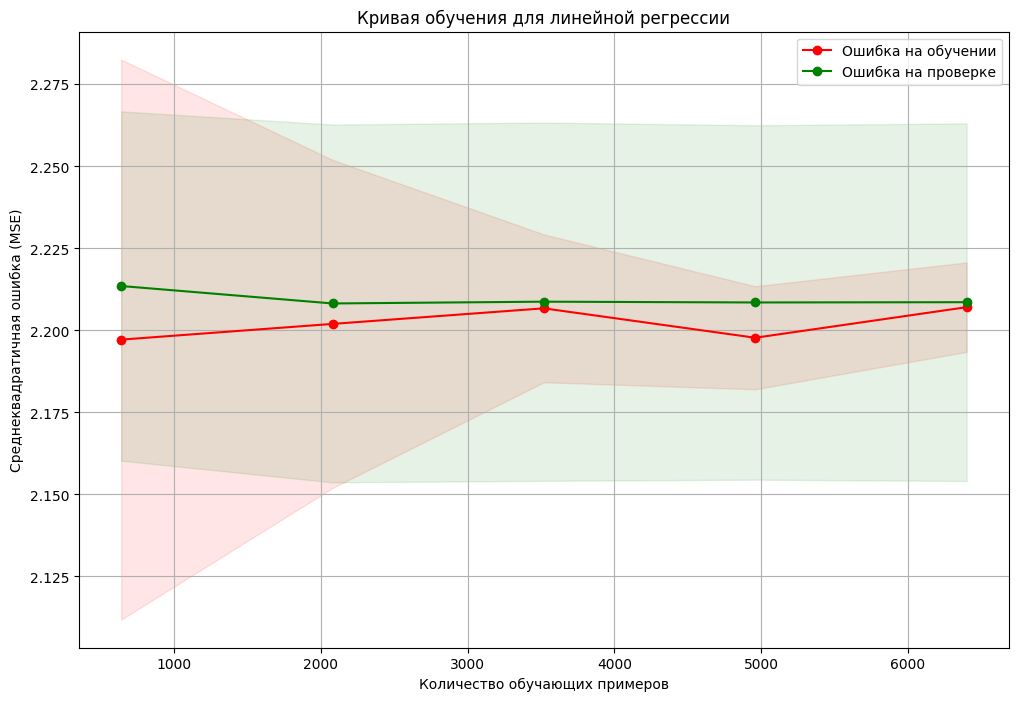

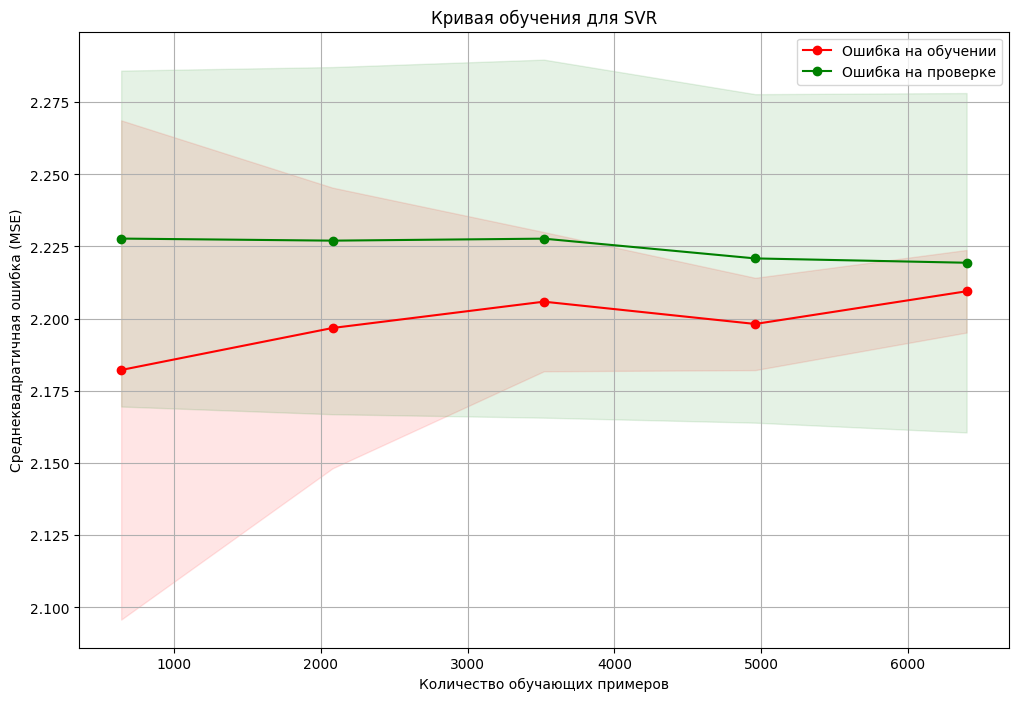

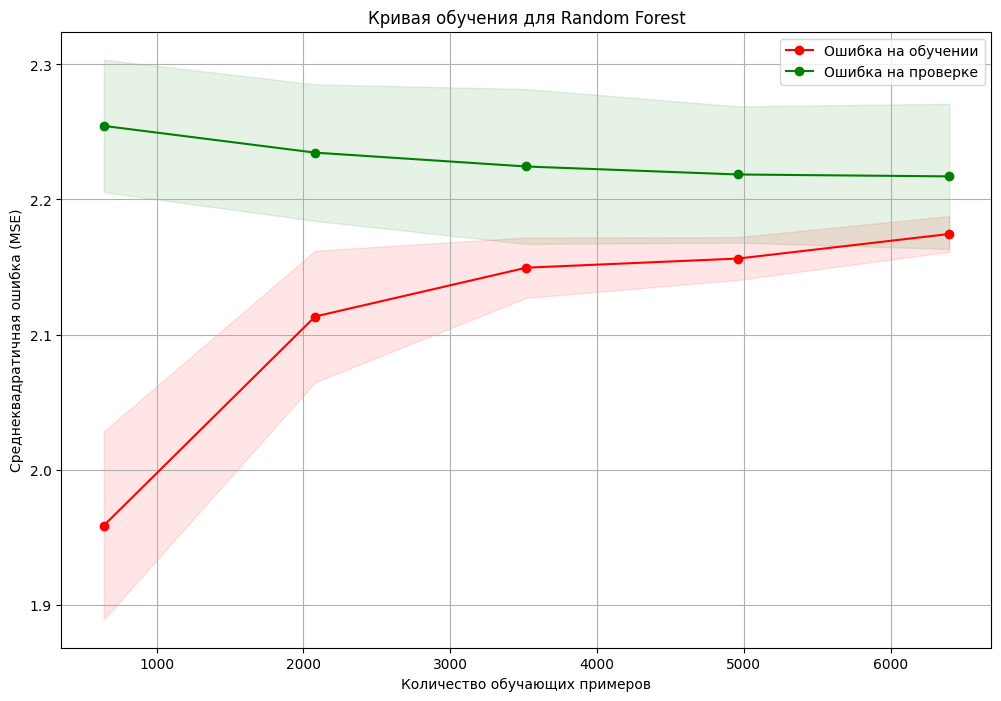

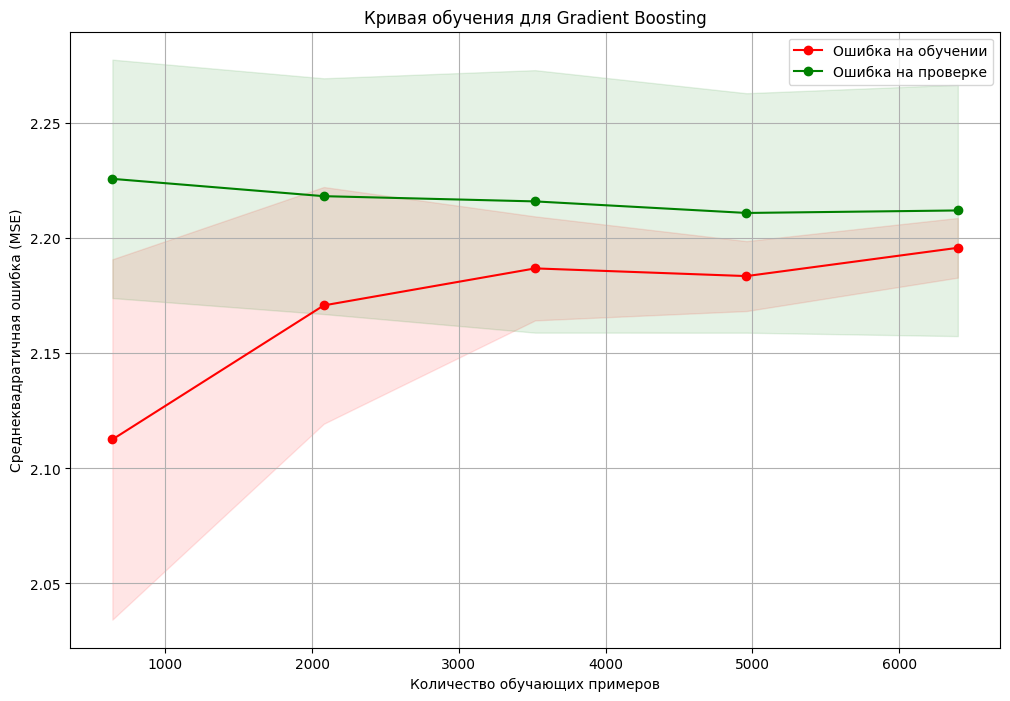

In [36]:

plot_learning_curve(lr_model, "Кривая обучения для линейной регрессии", X_train_scaled, y_train)


plot_learning_curve(svr_model, "Кривая обучения для SVR", X_train_scaled, y_train)


plot_learning_curve(rf_best, "Кривая обучения для Random Forest", X_train_scaled, y_train)


plot_learning_curve(gb_best, "Кривая обучения для Gradient Boosting", X_train_scaled, y_train)

In [37]:
from sklearn.model_selection import cross_val_score

def ensemble_predictions(models, weights, X):
    predictions = []

    for model in models:
        pred = model.predict(X)
        predictions.append(pred)

    final_prediction = np.average(predictions, axis=0, weights=weights)

    return final_prediction

models = [lr_model, svr_model, rf_best, gb_best]
weights = [0.25, 0.25, 0.25, 0.25]


y_pred = ensemble_predictions(models, weights, X_test_scaled)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse:.4f}, MAE: {mae:.4f}')

RMSE: 1.4752, MAE: 1.2257


In [39]:
for model in models:
    print(model.n_features_in_)

1
1
1
1


In [40]:
for model in models:
    model.fit(X_train_scaled, y_train)

In [41]:
if len(X_test.shape) == 1:
    X_test = X_test.reshape(-1, 1)

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
data

,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
0,298.1,308.6,1551,42.8,0,0
1,298.2,308.7,1408,46.3,3,0
2,298.1,308.5,1498,49.4,5,0
3,298.2,308.6,1433,39.5,7,0
4,298.2,308.7,1408,40.0,9,0
...,...,...,...,...,...,...
9995,298.8,308.4,1604,29.5,14,0
9996,298.9,308.4,1632,31.8,17,0
9997,299.0,308.6,1645,33.4,22,0
9998,299.0,308.7,1408,48.5,25,0


In [44]:
data = data.drop(['Type'], axis=1)

KeyError: "['Type'] not found in axis"

In [45]:
data = data.drop(['Failure Type'], axis=1)

KeyError: "['Failure Type'] not found in axis"

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
target_col = 'Rotational speed [rpm]'
features = list(data.columns)
features.remove(target_col)


In [49]:
data[target_col] = pd.to_numeric(data[target_col])


In [50]:
target_col = 'Rotational speed [rpm]'
features = list(data.columns)
features.remove(target_col)

In [51]:
X_train, X_valid, y_train, y_valid = train_test_split(data[features], data[target_col], test_size=0.2, random_state=42)
X_test, _, y_test, _ = train_test_split(X_valid, y_valid, test_size=0.5, random_state=42)

In [52]:
param_grid = {'max_depth': range(2, 10)}

In [53]:
model = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, verbose=0)
model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 10)})

In [60]:
best_model = model.best_estimator_

In [61]:
y_pred_valid = best_model.predict(X_valid)

In [62]:
y_pred_test = best_model.predict(X_test)

In [63]:
print(classification_report(y_valid, y_pred_valid))
print(confusion_matrix(y_valid, y_pred_valid))

              precision    recall  f1-score   support

        1168       0.00      0.00      0.00         1
        1200       0.00      0.00      0.00         1
        1234       0.00      0.00      0.00         1
        1236       0.00      0.00      0.00         1
        1248       0.00      0.00      0.00         1
        1251       0.00      0.00      0.00         1
        1258       0.00      0.00      0.00         0
        1260       0.00      0.00      0.00         2
        1263       0.00      0.00      0.00         0
        1264       0.00      0.00      0.00         1
        1268       0.00      0.00      0.00         2
        1270       0.00      0.00      0.00         1
        1276       0.00      0.00      0.00         2
        1278       0.00      0.00      0.00         2
        1282       0.00      0.00      0.00         1
        1284       0.00      0.00      0.00         4
        1285       0.00      0.00      0.00         1
        1286       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

In [64]:
print(classification_report(y_test, y_pred_test))
print(confusion_matrix(y_test, y_pred_test))

              precision    recall  f1-score   support

        1168       0.00      0.00      0.00         1
        1200       0.00      0.00      0.00         1
        1258       0.00      0.00      0.00         0
        1260       0.00      0.00      0.00         2
        1263       0.00      0.00      0.00         0
        1264       0.00      0.00      0.00         1
        1268       0.00      0.00      0.00         2
        1276       0.00      0.00      0.00         1
        1278       0.00      0.00      0.00         1
        1284       0.00      0.00      0.00         3
        1286       0.00      0.00      0.00         1
        1288       0.00      0.00      0.00         0
        1289       0.00      0.00      0.00         1
        1291       0.00      0.00      0.00         1
        1295       0.00      0.00      0.00         1
        1298       0.00      0.00      0.00         1
        1301       0.00      0.00      0.00         1
        1303       0.00    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

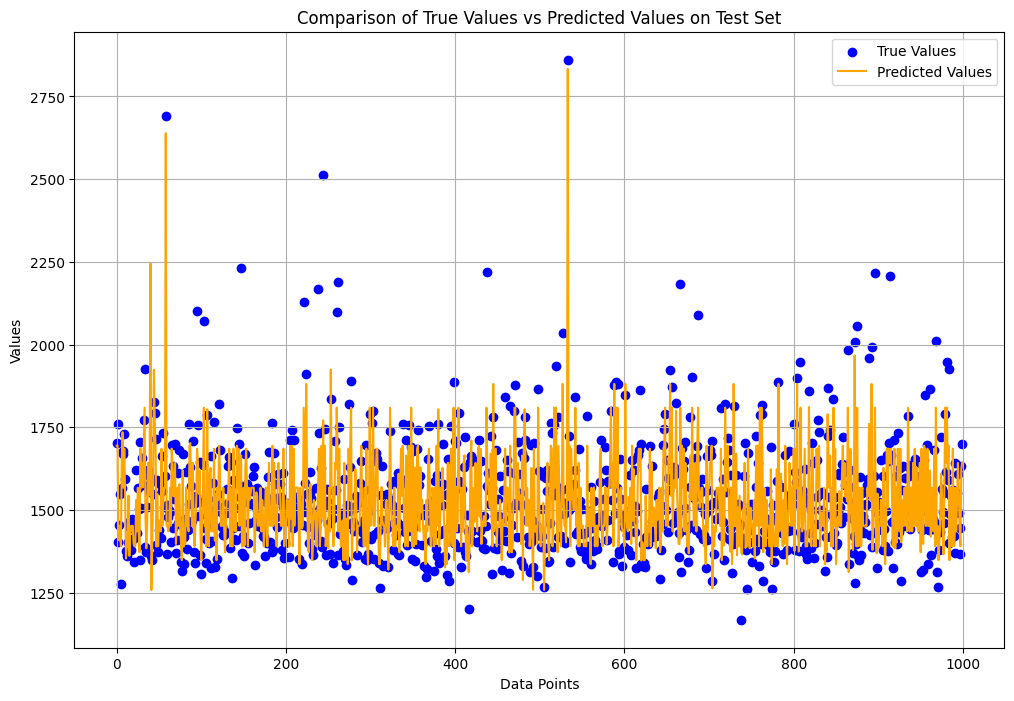

In [65]:
plt.figure(figsize=(12, 8))
plt.scatter(range(len(y_test)), y_test, label='True Values', color='blue')
plt.plot(range(len(y_pred_test)), y_pred_test, label='Predicted Values', color='orange')
plt.title('Comparison of True Values vs Predicted Values on Test Set')
plt.xlabel('Data Points')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()